# Using Population objects to create biased data

In [1]:
import mlsim
import pandas as pd
import numpy as np
import seaborn as sns
from collections import namedtuple

Create an all default population

In [2]:
pop = mlsim.bias.Population()

To view the details on this population, we can use the `get_parameter_description` method.

In [3]:
print(pop.get_parameter_description())

Demographic Parameters
DemParams(Pa=[0.5, 0.5], Pz_a=[[0.5, 0.5], [0.5, 0.5]])
Target Parameters 
TargetParams(Py_az=[[[0.95, 0.05], [0.95, 0.05]], [[0.95, 0.05], [0.95, 0.05]]])
Feature Parameters 
FeatureParams(distfunc=<function <lambda> at 0x7f6f9ffcb700>, theta=[[[[5, 2], [2, 5]], [[5, 2], [2, 5]]], [[[5, 2], [2, 5]], [[5, 2], [2, 5]]]])
Feature Noise Parameters 
NoiseParams(noisefunc=<function <lambda> at 0x7f6f9ffce280>, theta=[[[1.0, 1.0], [1.0, 1.0]], [[1.0, 1.0], [1.0, 1.0]]])


The instantiation just assigns values to these parameters. In order to get data, we use the `sample` method.

In [4]:
help(pop.sample)

Help on method sample in module mlsim.bias.populations:

sample(N, return_as='DataFrame') method of mlsim.bias.populations.Population instance
    sample N members of the  population, according to its underlying
    distribution
    
    Parameters
    -----------
    N : int
        number of samples
    return_as : string, 'dataframe'
        type to return as, can be pandas 'DataFrame' or IBM AIF360
        'structuredDataset'



In [5]:
pop_df1 = pop.sample(100)
pop_df1.head()

,a,z,y,x0,x1
0,0.0,0.0,0.0,4.197520,2.904405
1,0.0,1.0,1.0,1.421137,4.526929
2,1.0,0.0,0.0,5.319371,1.635306
3,0.0,0.0,0.0,4.633194,1.668945
4,0.0,0.0,0.0,7.137459,2.080956


## Changing the type of bias

Now demo some with various biases to create examples

In [6]:
# create a correlated demographic sampler
label_bias_dem = mlsim.bias.DemographicCorrelated(rho_a=.2,rho_z=[.25,.15])

# instantiate a population with that
pop_label_bias = mlsim.bias.PopulationInstantiated(demographic_sampler=label_bias_dem)

In [7]:
pop_label_bias_df1 = pop_label_bias.sample(100)
pop_label_bias_df1.head()

,a,z,y,x0,x1
0,0.0,0.0,0.0,6.781521,5.152470
1,0.0,0.0,0.0,6.484544,2.501704
2,0.0,0.0,0.0,8.367118,3.215052
3,0.0,0.0,0.0,2.697172,2.829630
4,0.0,1.0,1.0,3.292006,4.735590


New we'll create a feature bias where the classes are separable for one group and not for the other.

In [8]:
feature_sample_dist = lambda mu,cov :np.random.multivariate_normal(mu,cov)
per_group_means = [[[1,2,3,4,3,3],[4,6,8,8,10,6]],[[3,2,3,4,4,3],[1,3,4,4,5,3]]]
D =6
shared_cov = [np.eye(D)*.75,.95*np.eye(D)]
feature_bias = mlsim.bias.FeaturePerGroupSharedParamWithinGroup(
            feature_sample_dist,per_group_means,shared_cov)
pop_feature_bias = mlsim.bias.PopulationInstantiated(feature_sampler=feature_bias)

In [9]:
pop_feature_bias_df1 = pop_feature_bias.sample(100)
pop_feature_bias_df1.head()

,a,z,y,x0,x1,x2,x3,x4,x5
0,1.0,0.0,0.0,4.434557,4.980872,10.492508,8.684894,10.451194,6.148952
1,1.0,1.0,1.0,1.137725,0.455506,4.084412,2.923459,4.215092,2.588954
2,0.0,1.0,1.0,3.926741,3.489567,1.869188,3.420450,3.990602,4.050809
3,0.0,1.0,1.0,4.844964,3.830380,1.346939,4.274792,3.227639,2.572544
4,1.0,1.0,1.0,-0.842779,3.583597,4.642626,4.379923,3.825908,2.053350


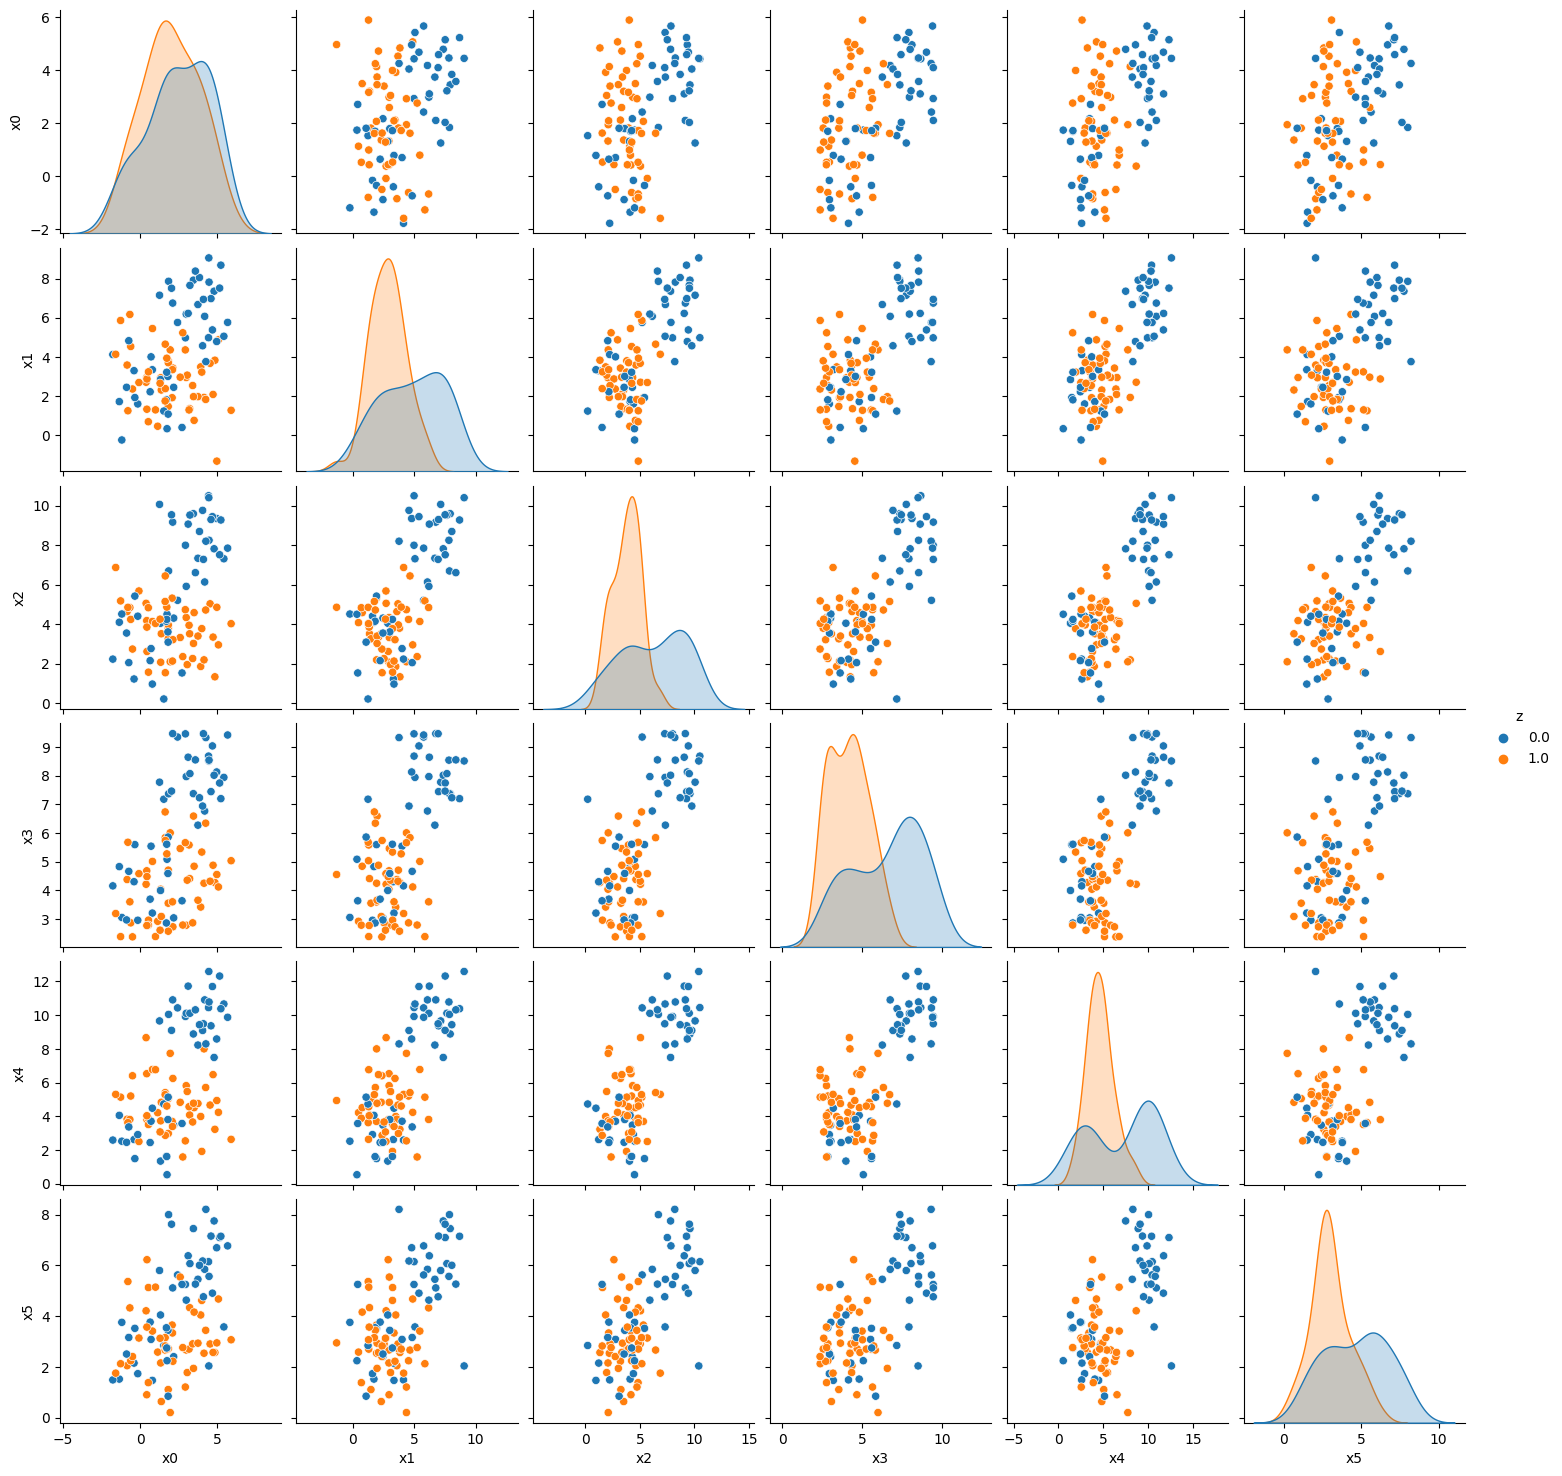

In [10]:
var_list = ['x'+ str(i) for i in range(D)]
g = sns.pairplot(pop_feature_bias_df1, vars= var_list, hue = 'z')

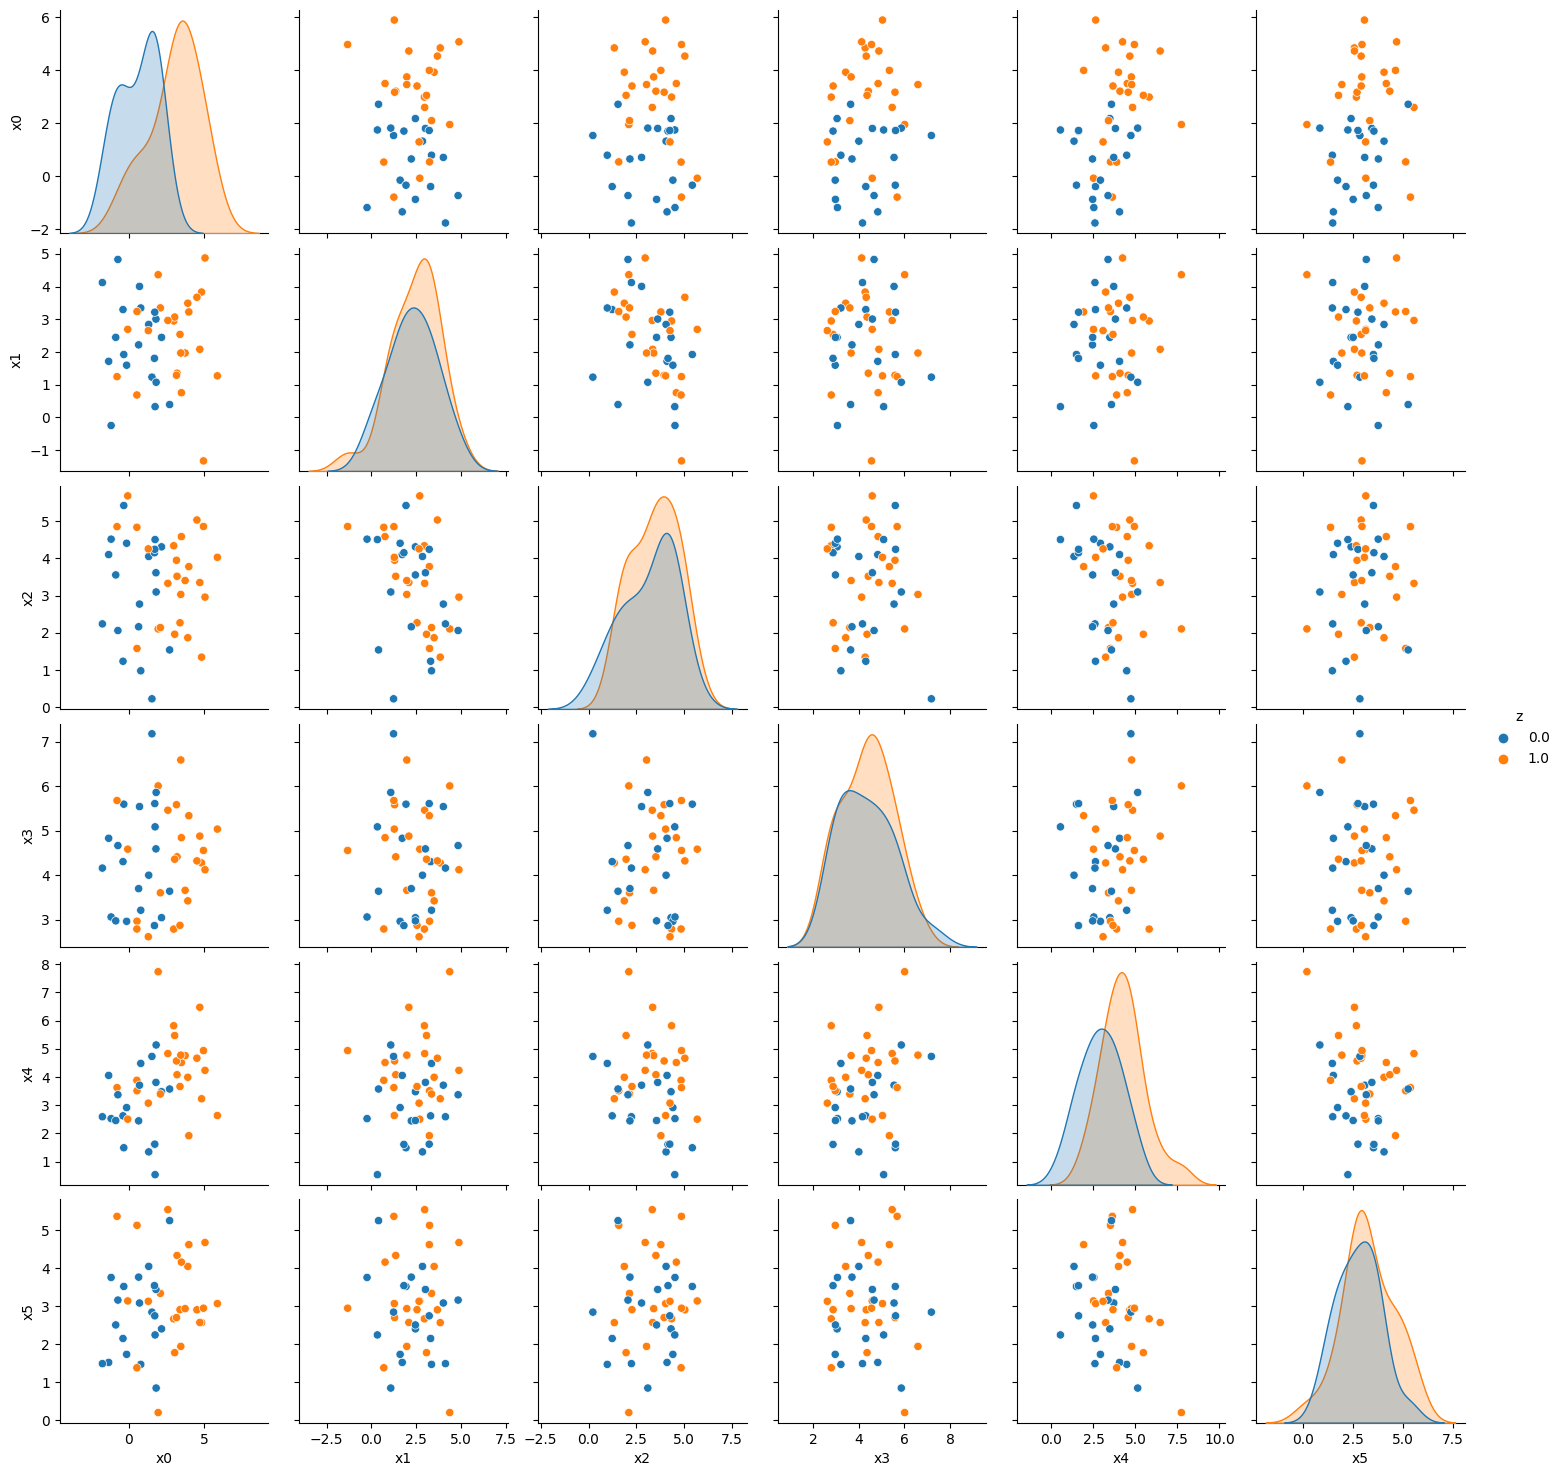

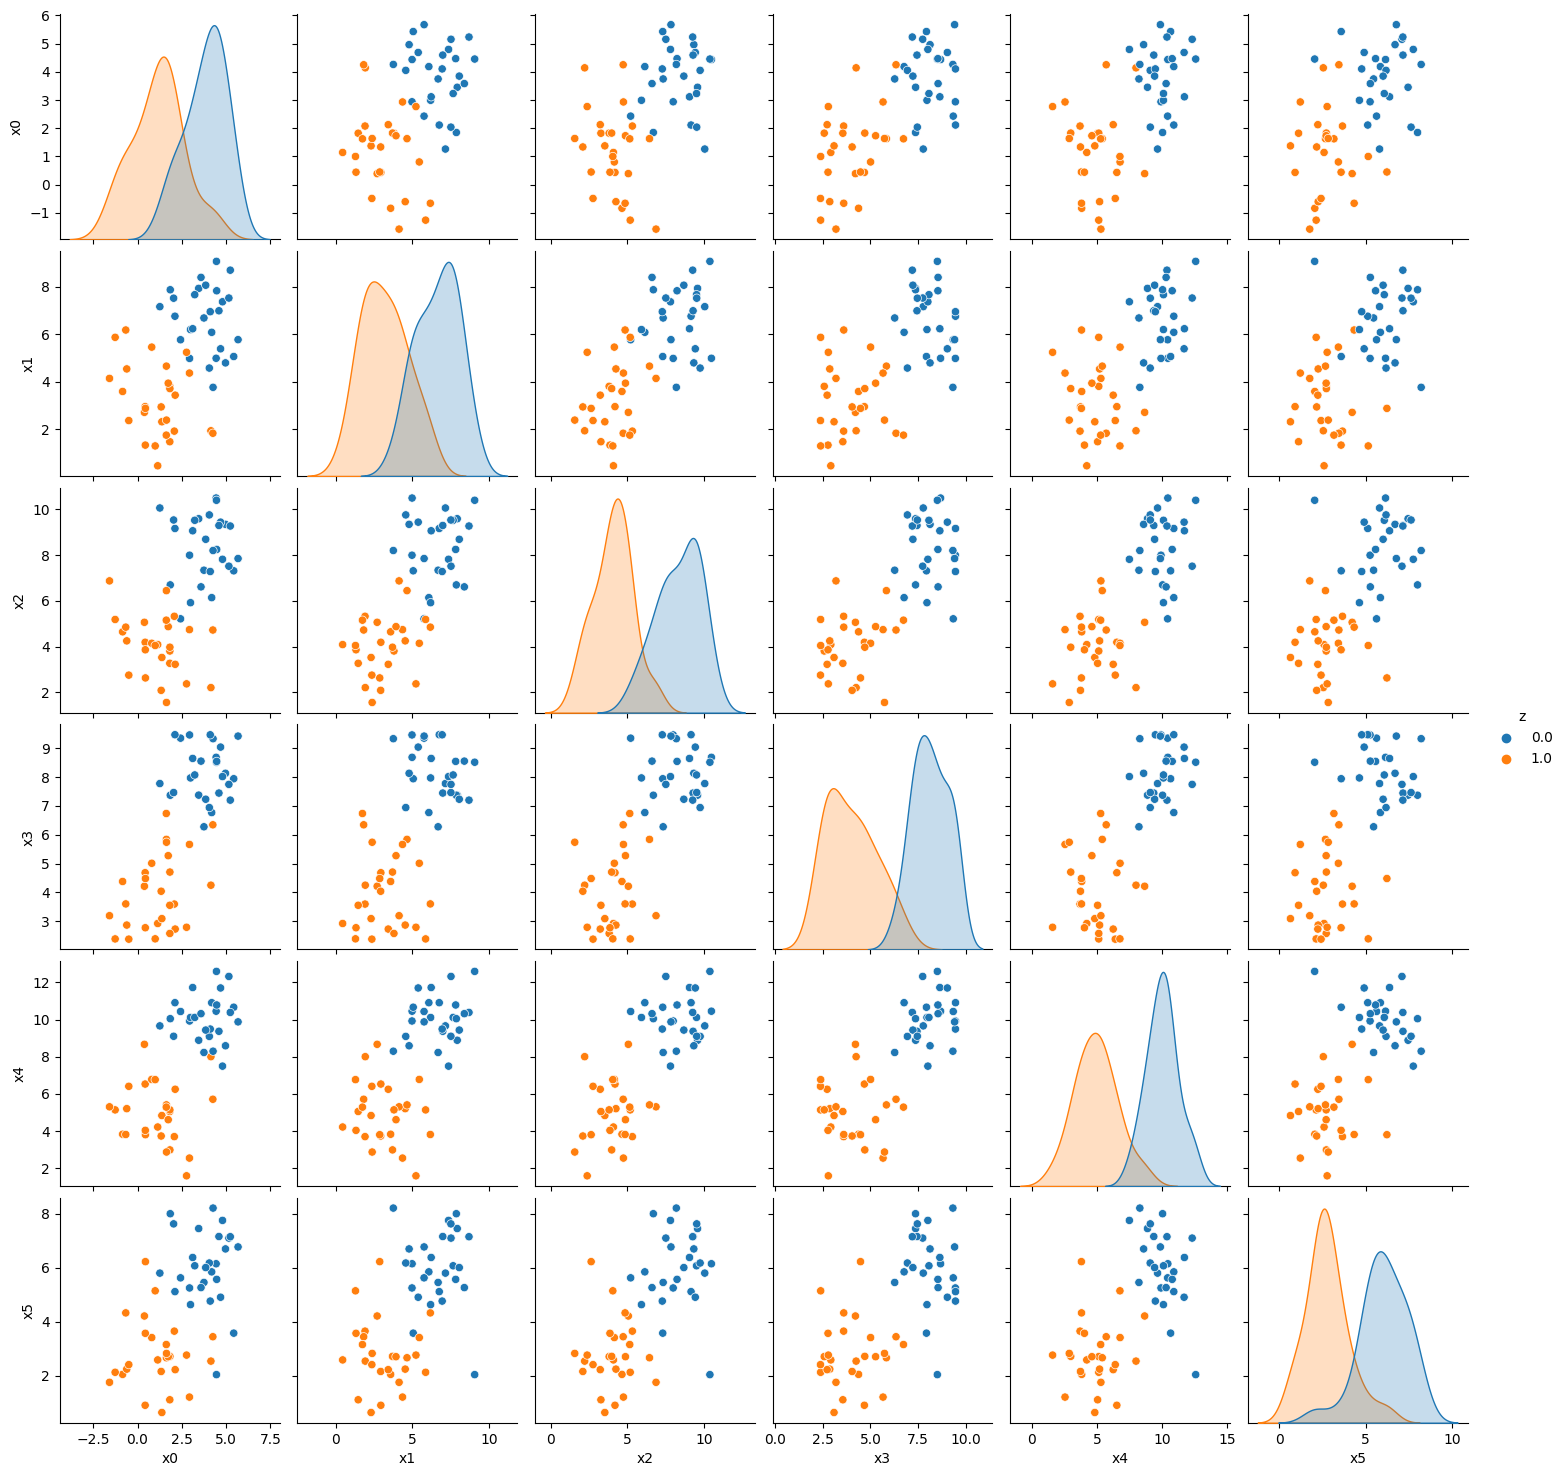

In [11]:
[sns.pairplot(dffbai, vars= var_list, hue = 'z') for ai,dffbai in pop_feature_bias_df1.groupby('a')]